## GGRM Stock Analysis

In [2]:
pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23909 sha256=fd057f66a5c4ce2ac180951ce7b4808eeadec0153c22446eca61131e3a416ec5
  Stored in directory: c:\users\snowden\appdata\local\pip\cache\wheels\ec\cc\c1\32da8ee853d742d5d7cbd11ee04421222eb354672020b57297
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8368 sha256=695116d4de3689bc512d8599c9169f87765b0ab825c723c0406e705bce7e5da7
  Stored in directory: c:\users\snowden\appdata\local\pip\cache\wheels\57\6d\a3\a39b839cc75274d2acfb1c58bfead2f726c6577fe8c4723f13
Successfully built yfinance multitasking
Note: you may need to restart the kernel to use updated packages.


### Import Libaries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.formula.api as smf
import requests
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
pd.options.mode.chained_assignment = None  # default='warn'
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
%matplotlib inline
import plotly.graph_objects as go
from plotly.subplots import make_subplots
palette = ['#F5DF4D', '#939597', '#0F4C81', '#FF6F61', '#5F4B8B', '#88B04B', '#92A8D1', '#F7CAC9', '#955251',\
           '#B163A3', '#009473']
palette.reverse()

### Import Data using Yahoo Finance

In [21]:
GGRM_data = yf.Ticker("GGRM.JK")

In [22]:
GGRM= GGRM_data.history(period="max")
GGRM.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2001-06-07,6801.507320,6857.486804,6773.517578,6773.517578,744000,0.0,0
2001-06-08,6801.506331,6801.506331,6745.526855,6745.526855,482000,0.0,0
2001-06-11,6773.517586,6857.486812,6773.517586,6829.497070,1006000,0.0,0
2001-06-12,6857.486407,7277.332514,6829.496667,7249.342773,7133500,0.0,0
2001-06-13,7333.312465,7361.302207,7081.404785,7081.404785,4351000,0.0,0


<AxesSubplot:xlabel='Date', ylabel='Open'>

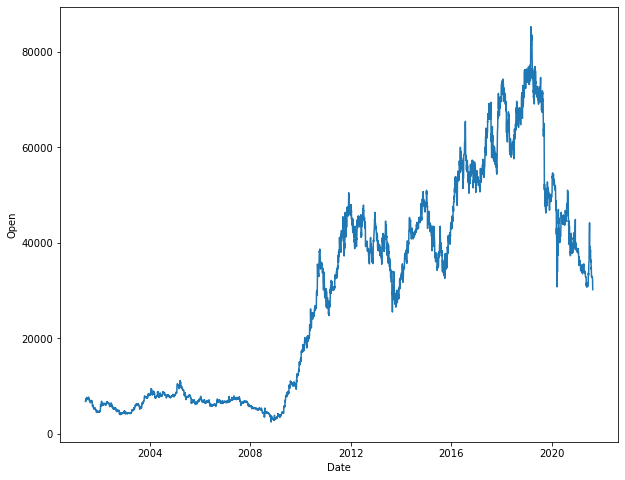

In [23]:
plt.figure(figsize=(10, 8))
sns.lineplot(x="Date", y="Open", data=GGRM)

In [24]:
GGRM['PriceDiff'] = GGRM['Close'].shift(-1) - GGRM['Close']
print(GGRM.head())

                   Open         High          Low        Close   Volume  \
Date                                                                      
2001-06-07  6801.507320  6857.486804  6773.517578  6773.517578   744000   
2001-06-08  6801.506331  6801.506331  6745.526855  6745.526855   482000   
2001-06-11  6773.517586  6857.486812  6773.517586  6829.497070  1006000   
2001-06-12  6857.486407  7277.332514  6829.496667  7249.342773  7133500   
2001-06-13  7333.312465  7361.302207  7081.404785  7081.404785  4351000   

            Dividends  Stock Splits   PriceDiff  
Date                                             
2001-06-07        0.0             0  -27.990723  
2001-06-08        0.0             0   83.970215  
2001-06-11        0.0             0  419.845703  
2001-06-12        0.0             0 -167.937988  
2001-06-13        0.0             0   55.979980  


In [25]:
GGRM['Return'] = GGRM['PriceDiff'] /GGRM['Close']
print(GGRM.head())

                   Open         High          Low        Close   Volume  \
Date                                                                      
2001-06-07  6801.507320  6857.486804  6773.517578  6773.517578   744000   
2001-06-08  6801.506331  6801.506331  6745.526855  6745.526855   482000   
2001-06-11  6773.517586  6857.486812  6773.517586  6829.497070  1006000   
2001-06-12  6857.486407  7277.332514  6829.496667  7249.342773  7133500   
2001-06-13  7333.312465  7361.302207  7081.404785  7081.404785  4351000   

            Dividends  Stock Splits   PriceDiff    Return  
Date                                                       
2001-06-07        0.0             0  -27.990723 -0.004132  
2001-06-08        0.0             0   83.970215  0.012448  
2001-06-11        0.0             0  419.845703  0.061475  
2001-06-12        0.0             0 -167.937988 -0.023166  
2001-06-13        0.0             0   55.979980  0.007905  


### Analyzing using MA 100 and MA 200 for long term-trading 

In [29]:
GGRM['ma100'] = GGRM['Close'].rolling(100).mean()

In [30]:
GGRM['ma200'] = GGRM['Close'].rolling(200).mean()

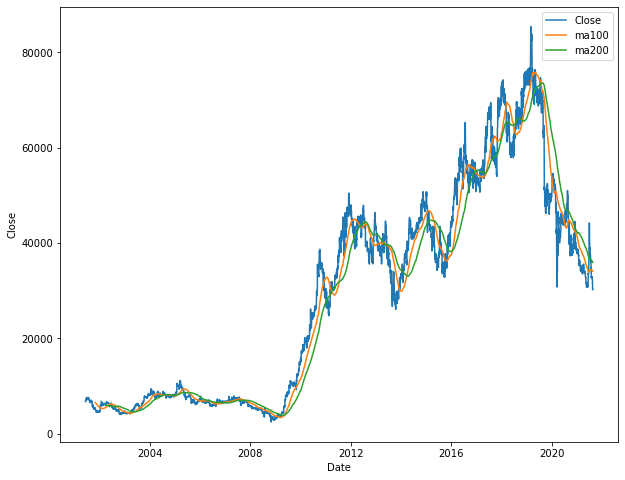

In [32]:
#plot the moving average
plt.figure(figsize=(10, 8))
sns.lineplot(x="Date", y="Close", data=GGRM)
sns.lineplot(x="Date", y="ma100", data=GGRM)
sns.lineplot(x="Date", y="ma200", data=GGRM)
plt.legend(labels=["Close","ma100", "ma200"])

##### Analysis :
1. as long as the price position is still above the ma200 then it will be an uptrend
2. but if the price position is below ma 200 then it will be a downtrend
3. if ma100 crosses down through the position of ma200 it will be a down trend
4. if ma100 crosses up through the position of ma200 it will be an up trend

##### Graph below is for calculating the profit

In [35]:
GGRM['Shares'] = [1 if GGRM.loc[ei, 'ma100']>GGRM.loc[ei, 'ma200'] else 0 for ei in GGRM.index]

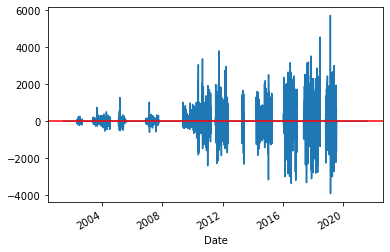

In [36]:
GGRM['Close1'] = GGRM['Close'].shift(-1)
GGRM['Profit'] = [GGRM.loc[ei, 'Close1'] - GGRM.loc[ei, 'Close'] if GGRM.loc[ei, 'Shares']==1 else 0 for ei in GGRM.index]
GGRM['Profit'].plot()
plt.axhline(y=0, color='red')

In [37]:
GGRM['wealth'] = GGRM['Profit'].cumsum()
GGRM.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,PriceDiff,Return,ma100,ma200,Close1,Shares,Profit,wealth
Date,,,,,,,,,,,,,,,
2021-08-13,32950.0,33000.0,32525.0,32600.0,664800,0.0,0,-350.0,-0.010736,34286.522812,36137.925156,32250.0,0,0.0,40928.901855
2021-08-16,32625.0,32725.0,32150.0,32250.0,1161300,0.0,0,-1375.0,-0.042636,34269.500430,36093.053262,30875.0,0,0.0,40928.901855
2021-08-18,32250.0,32300.0,30800.0,30875.0,3802000,0.0,0,-675.0,-0.021862,34235.922070,36043.995430,30200.0,0,0.0,40928.901855
2021-08-19,30875.0,30900.0,30175.0,30200.0,1621100,0.0,0,100.0,0.003311,34184.603672,35989.691953,30300.0,0,0.0,40928.901855
2021-08-20,30200.0,30425.0,29925.0,30300.0,1029800,0.0,0,NaN,NaN,34134.285273,35939.746680,NaN,0,0.0,40928.901855


Text(0.5, 1.0, 'Total money you have made: 40928.90185546875')

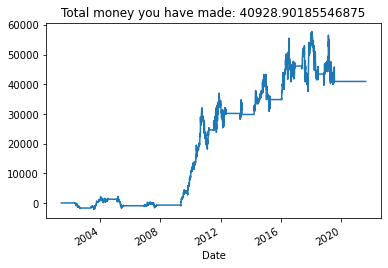

In [39]:
GGRM['wealth'].plot()
plt.title('Total money you have made: {}'.format(GGRM.loc[GGRM.index[-2], 'wealth']))

In [40]:
GGRM['LogReturn'] = np.log(GGRM['Close']).shift(-1) - np.log(GGRM['Close'])
print(GGRM['LogReturn'])

Date
2001-06-07   -0.004141
2001-06-08    0.012371
2001-06-11    0.059660
2001-06-12   -0.023439
2001-06-13    0.007874
                ...   
2021-08-13   -0.010794
2021-08-16   -0.043571
2021-08-18   -0.022105
2021-08-19    0.003306
2021-08-20         NaN
Name: LogReturn, Length: 4955, dtype: float64


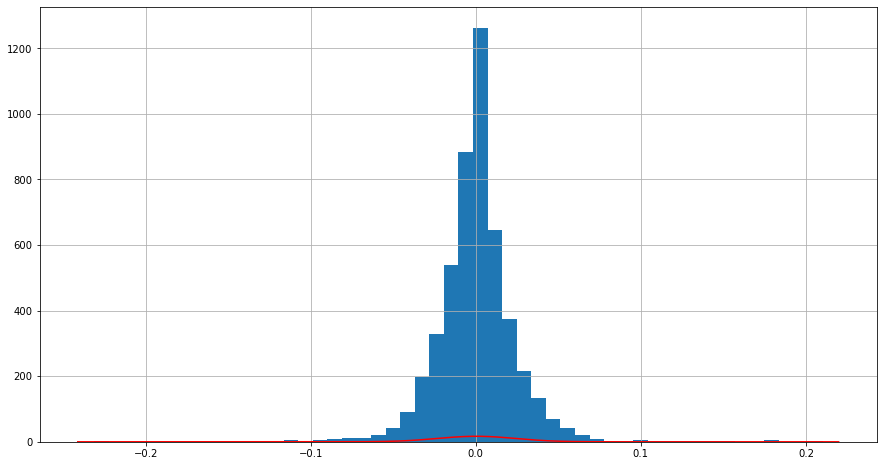

In [41]:
from scipy.stats import norm
mu = GGRM['LogReturn'].mean()
sigma = GGRM['LogReturn'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(GGRM['LogReturn'].min()-0.01, GGRM['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

GGRM['LogReturn'].hist(bins=50, figsize=(15, 8))
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

#### Showing Probability

In [44]:
prob_return1 = norm.cdf(-0.06, mu, sigma)
print('The probability of dropping over 6% in one day ', prob_return1)

The probability of dropping over 6% in one day  0.005413797163838895


In [43]:
mu220 = 365*mu
sigma220 = (365**0.5) * sigma
drop20 = None
print('The probability of dropping over 25% over a year: ', drop20)

The probability of dropping over 25% over a year:  None


In [45]:
VaR = norm.ppf(0.05, mu, sigma)
print('Single day value at risk is: ', VaR)

Single day value at risk is:  -0.038622354307988896


In [46]:
# Quatile 
# 5% quantile
print('5% quantile ', norm.ppf(0.05, mu, sigma))
# 95% quantile
print('95% quantile ', norm.ppf(0.95, mu, sigma))

5% quantile  -0.038622354307988896
95% quantile  0.03922716947849686


In [47]:
GGRM['logReturn'] = np.log(GGRM['Close'].shift(-1)) - np.log(GGRM['Close'])
sample_size = GGRM['logReturn'].shape[0]
sample_mean = GGRM['logReturn'].mean()
sample_std = GGRM['logReturn'].std(ddof=1) / sample_size**0.5
# left and right quantile
z_left = norm.ppf(0.05)
z_right = norm.ppf(0.95)

# upper and lower bound
interval_left = sample_mean+z_left*sample_std
interval_right = sample_mean+z_right*sample_std

In [48]:
print('90% confidence interval is ', (interval_left, interval_right))

90% confidence interval is  (-0.00025056568044912734, 0.0008553808509571099)


In [50]:
GGRM.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,PriceDiff,Return,ma100,ma200,Close1,Shares,Profit,wealth,LogReturn,logReturn
Date,,,,,,,,,,,,,,,,,
2001-06-07,6801.507320,6857.486804,6773.517578,6773.517578,744000,0.0,0,-27.990723,-0.004132,NaN,NaN,6745.526855,0,0.0,0.0,-0.004141,-0.004141
2001-06-08,6801.506331,6801.506331,6745.526855,6745.526855,482000,0.0,0,83.970215,0.012448,NaN,NaN,6829.497070,0,0.0,0.0,0.012371,0.012371
2001-06-11,6773.517586,6857.486812,6773.517586,6829.497070,1006000,0.0,0,419.845703,0.061475,NaN,NaN,7249.342773,0,0.0,0.0,0.059660,0.059660
2001-06-12,6857.486407,7277.332514,6829.496667,7249.342773,7133500,0.0,0,-167.937988,-0.023166,NaN,NaN,7081.404785,0,0.0,0.0,-0.023439,-0.023439
2001-06-13,7333.312465,7361.302207,7081.404785,7081.404785,4351000,0.0,0,55.979980,0.007905,NaN,NaN,7137.384766,0,0.0,0.0,0.007874,0.007874


In [52]:
Train = GGRM.iloc[-2000:-1000, :]
Test = GGRM.iloc[-1000:, :]
print(Train.shape, Test.shape)

(1000, 17) (1000, 17)


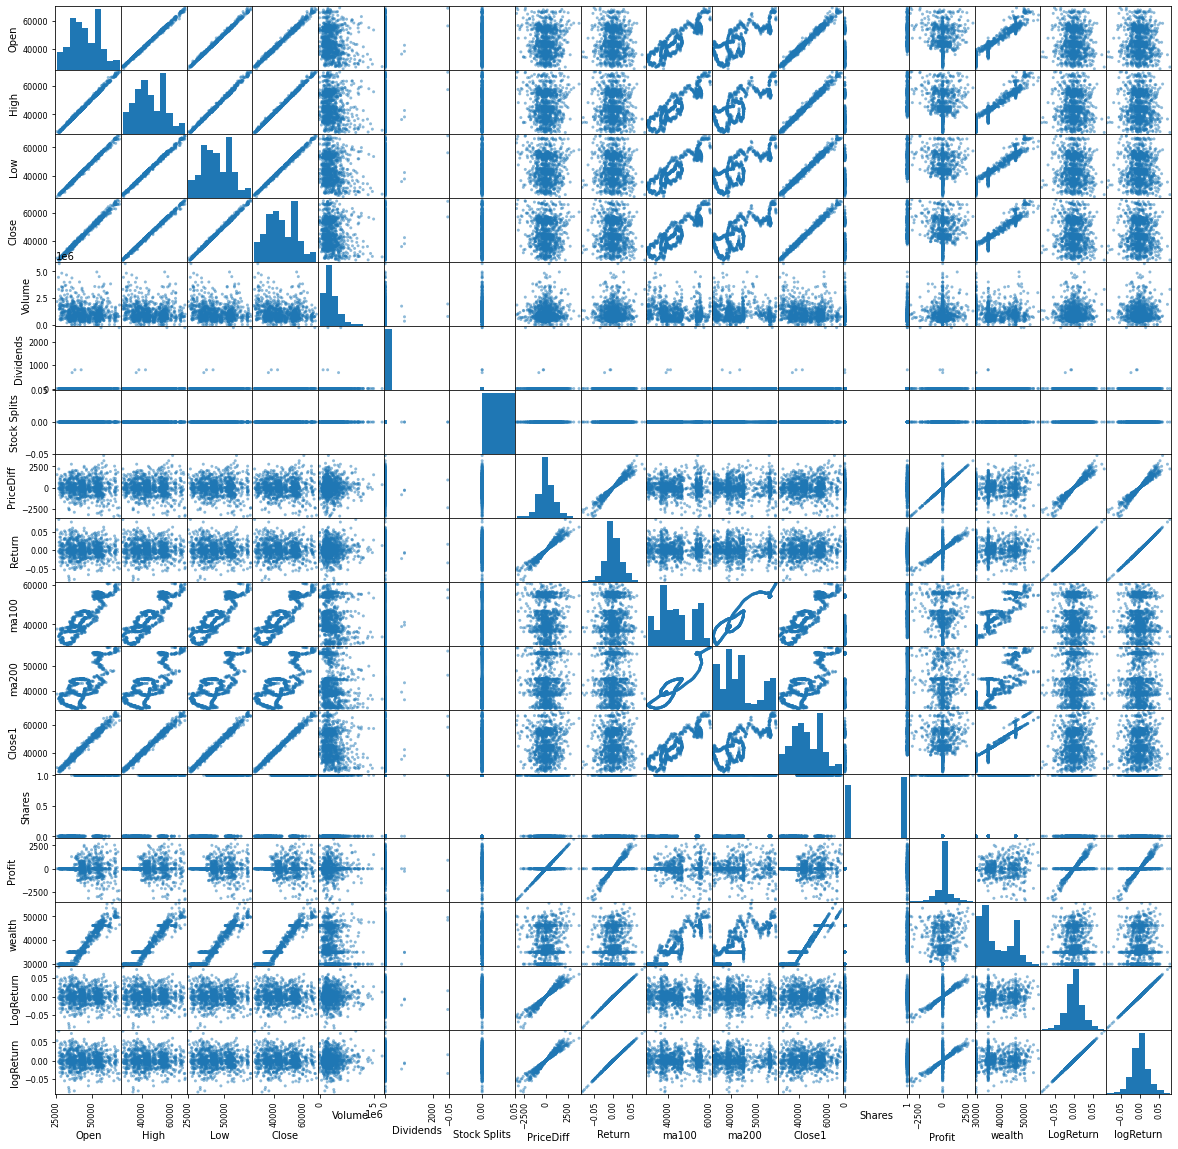

In [54]:
from pandas.plotting import scatter_matrix
sm = scatter_matrix(Train, figsize=(20, 20))